Taller 4 - métodos computacionales 2

Silvana Archila y Catalina Fuentes

Convergencia alcanzada en 9207 iteraciones.


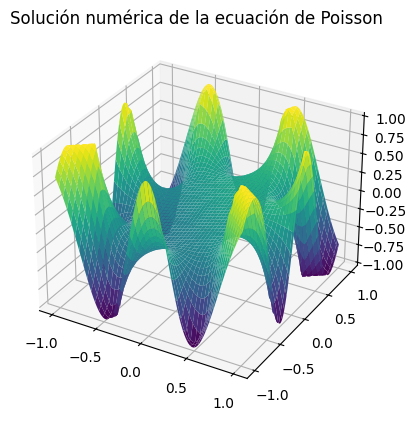

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la grilla
N = 50  # Tamaño de la grilla (más grande que el círculo unitario)
delta = 1.0 / (N - 1)  # Espaciado de la grilla
tolerancia = 1e-4  # Criterio de convergencia
max_iteraciones = 15000

# Coordenadas x, y
x = np.linspace(-1., 1., N)
y = np.linspace(-1., 1., N)
X, Y = np.meshgrid(x, y)

# Inicialización de la función phi y la densidad de carga rho
phi = np.random.rand(N, N)  # Interior del círculo con valores aleatorios
rho = -(X + Y)  # Densidad de carga

# Condiciones de frontera en el círculo unitario
theta = np.arctan2(Y, X)
frontera = np.sqrt(X**2 + Y**2) >= 1  # Definir puntos de la frontera
phi[frontera] = np.sin(7 * theta[frontera])  # Aplicar la condición de frontera

# Iterar hasta la convergencia
for iteracion in range(max_iteraciones):
    phi_vieja = phi.copy()  # Guardar el estado anterior de la solución

    # Actualizar phi en el interior usando diferencias finitas
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            if np.sqrt(X[i, j]**2 + Y[i, j]**2) < 1:  # Solo actualizar dentro del círculo
                phi[i, j] = 0.25 * (phi_vieja[i+1, j] + phi_vieja[i-1, j] +
                                    phi_vieja[i, j+1] + phi_vieja[i, j-1] -
                                    delta**2 * 4 * np.pi * rho[i, j])

    # Comprobar convergencia
    diferencia = np.max(np.abs(phi - phi_vieja))
    if diferencia < tolerancia:
        print(f'Convergencia alcanzada en {iteracion} iteraciones.')
        break
else:
    print('No se alcanzó la convergencia en el número máximo de iteraciones.')

# Mostrar el resultado como una gráfica 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, phi, cmap='viridis')
ax.set_title('Solución numérica de la ecuación de Poisson')
plt.show()
